In [23]:
# Load packages
import sys
import json
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering, KMeans
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import itertools
import numpy as np
sys.path.append('../code/')
from painter import *
from text_preprocess import *
seed = 208

Exploratory Data Analysis

In [2]:
# Load data
f = open('../data/train.json','r', encoding = 'utf-8')
data = pd.read_json(f)
data

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


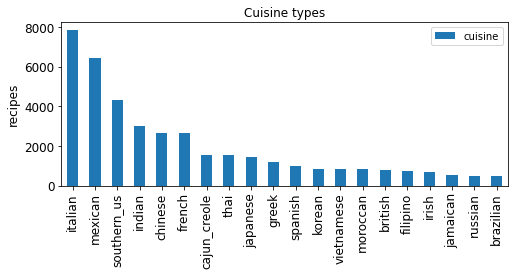

In [3]:
# Visualize the number of cuisines 
ax = data['cuisine'].value_counts().plot(kind='bar', title ="Cuisine types", figsize=(8, 3), legend=True, fontsize=12)
ax.set_ylabel("recipes", fontsize=12)
plt.show()

In [4]:
# Look at the top 50 ingredients
a = data['ingredients']
ax = list(itertools.chain.from_iterable(a))
listofingredients = Counter(ax)
# Convert Counter Object to dataframe
ingredientsCount = pd.DataFrame.from_dict(listofingredients, orient='index').reset_index()
# Change the column name
ingredientsCount.columns = ["ingredient", "count"]
# Get the top 50 rows after sorting
top50food = ingredientsCount.sort_values(by="count", ascending=False).head(50)

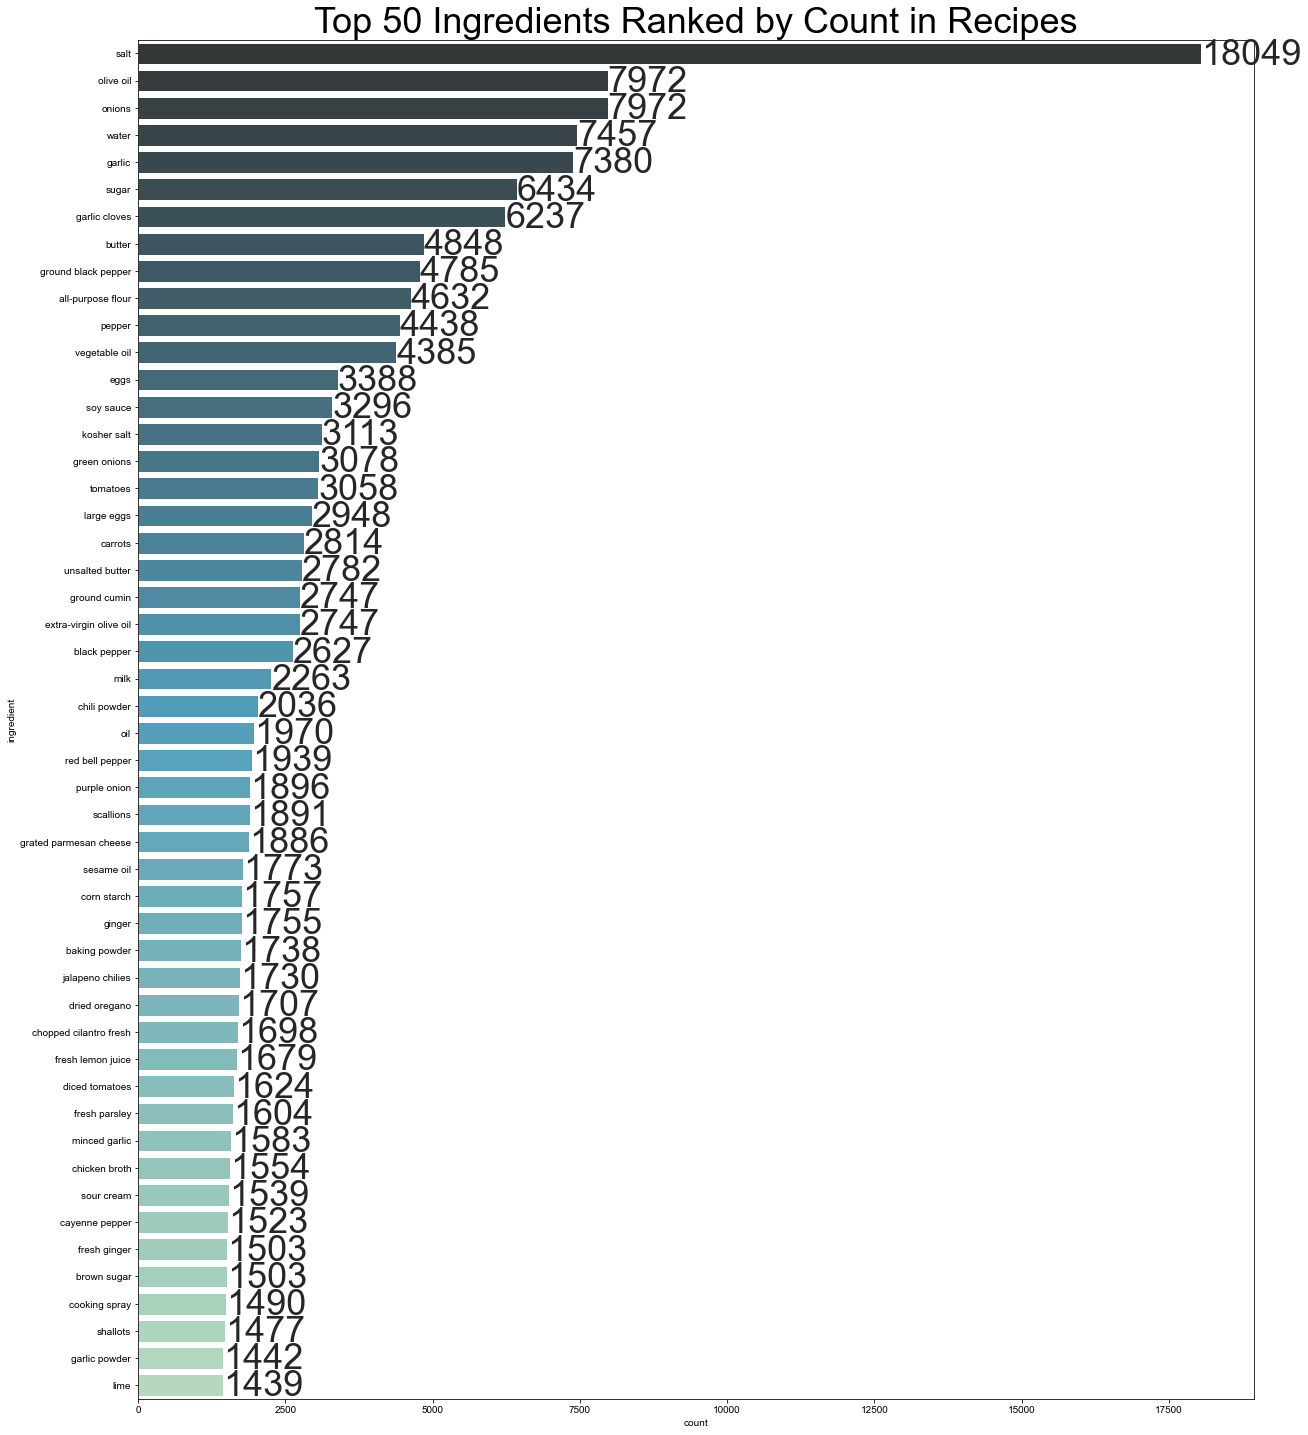

In [5]:
# Plot out the top 50 ingredients
plotBar(top50food, xlab="count", ylab="ingredient", title='Top 50 Ingredients Ranked by Count in Recipes', scale = True, show_font_on_har= True, col_palette = "GnBu_d")

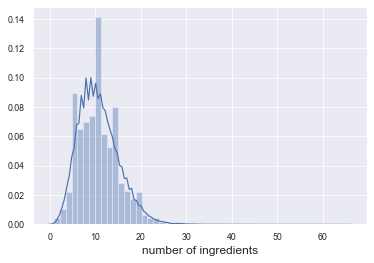

In [6]:
# Add the number of ingredients to the data
data["number of ingredients"] = data["ingredients"].apply(len)
# Plot the distribution of the number of ingredients
sns.set_context("paper", rc={"font.size":12,"axes.labelsize":12})# adjust the font size  
sns.distplot(data["number of ingredients"])# plot the graph

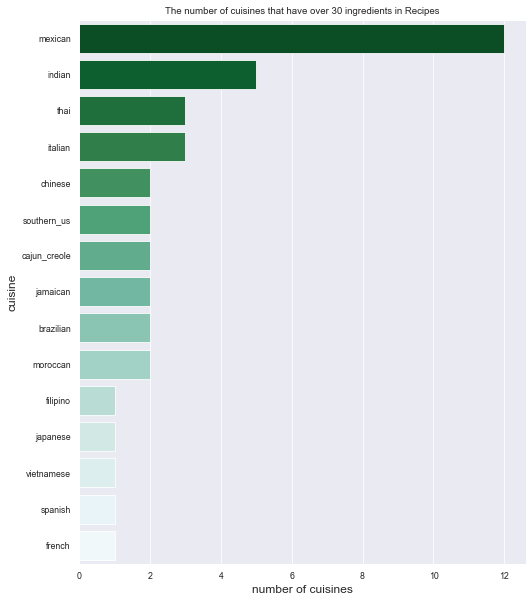

In [7]:
# Show all the cuisine that has more than 30 ingredients
over30ingredients = Counter(data[data["number of ingredients"]>30]["cuisine"])
over30ingredients = pd.DataFrame.from_dict(over30ingredients, orient='index').reset_index()
# Change the column name
over30ingredients.columns = ["cuisine", "number of cuisines"]
# Sort values from highest to lowest
over30ingredients = over30ingredients.sort_values(by="number of cuisines", ascending = False)
# Plot the bar chart
plotBar(over30ingredients, xlab= "number of cuisines", ylab= "cuisine", size =(8,10),title ='The number of cuisines that have over 30 ingredients in Recipes', )

**Preprocessing steps:**
1. Turning to lower case
2. remove all ( .oz) description
3. Lemmatizing the string
4. De-accent the string
5. Strip out everything else besides letter

In [8]:
# Clean the ingredient text data
corpus = text_preprocess(data)
# Flatten a list of lists for bag of words model
bow_corpus = [" ".join(doc) for doc in corpus]

**Apply the following find the vectorial representation**

* Tfidf vectorizer
* Count vectorizer
* Normalized Count vectorizer
* Word2vec model
* Normalized Word2vec model

**1. Tfidf vectorizer**

In [9]:
# convert text to word frequency vectors with TfidfVectorizer.
vectorizer = TfidfVectorizer() 
tfidf = vectorizer.fit_transform(bow_corpus)
tfidf = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())
tfidf

,abalone,abbamele,absinthe,abura,acai,accent,accompaniment,achiote,acid,acinus,...,yuzu,yuzukosho,zaatar,zatarains,zero,zest,zesty,zinfandel,ziti,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
39770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.346432,0.0,0.0,0.0
39771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
39772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


**2. Counter Vectorizer**

In [10]:
# convert text to word count vectors with CountVectorizer.
vec = CountVectorizer()
X = vec.fit_transform(bow_corpus)
dtm = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
dtm

,abalone,abbamele,absinthe,abura,acai,accent,accompaniment,achiote,acid,acinus,...,yuzu,yuzukosho,zaatar,zatarains,zero,zest,zesty,zinfandel,ziti,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
39771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**3. Normalized Counter Vectorizer**

In [11]:
normalizer = Normalizer()
norm_dtm = normalizer.fit_transform(dtm)
norm_dtm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**4. Normalized Word2Vec model**

In [12]:
# Word2vec model parameters
# Word vector dimensionality       
num_features = 300    # Word vector dimensionality  
# 50% of the corpus                                 
min_word_count = 3 
# Number of CPUs   
num_workers = 4       
# Context window size; 
# let's use avg recipte size   
context = 10
# threshold for configuring which higher-frequency words are randomly downsampled                                                                                         
downsampling = 1e-3   

# Initialize and train the model 
norm_word2vec = Word2Vec(corpus, workers=num_workers, \
                 size=num_features, min_count = min_word_count, \
                 window = context, sample = downsampling)

# init_sims will make the model much more memory-efficient.
norm_word2vec.init_sims(replace=True)

**5. Word2Vec model**

In [13]:
word2vec = Word2Vec(corpus, workers=num_workers, \
                 size=num_features, min_count = min_word_count, \
                 window = context, sample = downsampling)

**PCA decomposition**

In [14]:
# Run the PCA decomposition
pca = PCA(n_components=2)
# Implement PCA on the standardized data
result = pca.fit_transform(tfidf)
# Check the loadings
loadings = pd.DataFrame(pca.components_.T, columns= ['PC1', 'PC2'], index=tfidf.columns)
# Check which variable has the most loading in the first component
loadings.sort_values(by = "PC1", ascending= False)

,PC1,PC2
sugar,0.251856,0.166140
egg,0.242084,-0.043699
flour,0.241907,-0.065982
baking,0.207117,-0.021122
butter,0.196977,-0.089799
...,...,...
onion,-0.166772,0.015078
garlic,-0.173199,0.018950
tomato,-0.175189,-0.138810
fresh,-0.182490,-0.070718


In [15]:
# Check which variable has the most loading in the second component
loadings.sort_values(by = "PC2", ascending= False)

,PC1,PC2
sauce,-0.086373,0.344049
soy,-0.035487,0.305703
sesame,-0.025577,0.259655
rice,-0.053028,0.191988
ginger,-0.054193,0.188686
...,...,...
grated,0.006659,-0.137199
tomato,-0.175189,-0.138810
parmesan,-0.022466,-0.163294
olive,-0.158890,-0.196065


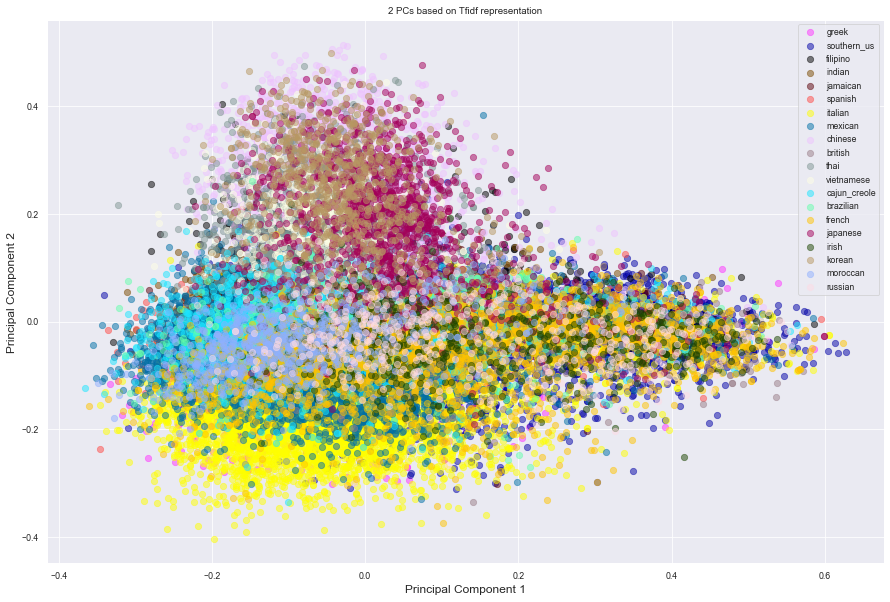

In [16]:
# Plot the PCA graph
plot2PCA(result, title = "2 PCs based on Tfidf representation", data=data)

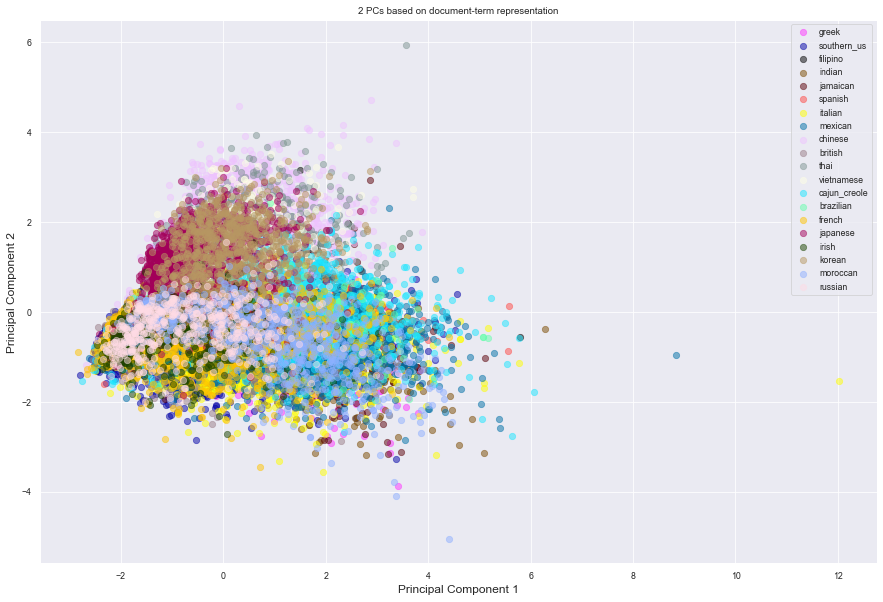

In [17]:
# Implement PCA on the standardized data
dtm_result = pca.fit_transform(dtm)
# Plot the PCA 
plot2PCA(dtm_result, title = "2 PCs based on document-term representation", data=data)

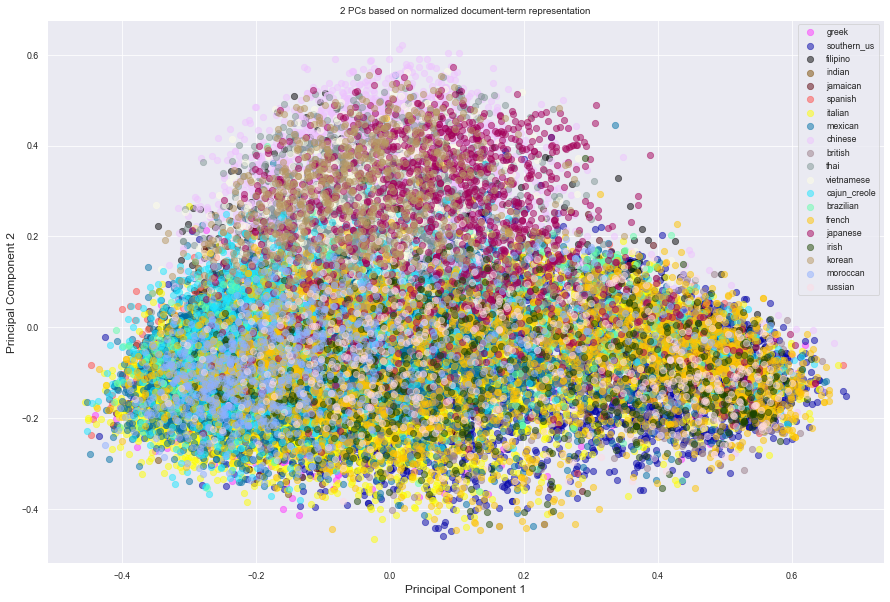

In [18]:
# Implement PCA on the standardized data
norm_dtm_result = pca.fit_transform(norm_dtm)
# Plot the PCA for normalized document-term matrices
plot2PCA(norm_dtm_result, title = "2 PCs based on normalized document-term representation", data=data)

**K Means Clustering for mapping labels**

In [19]:
# Apply K-means clustering for tfidf
kmeans = KMeans(n_clusters=20, random_state=seed).fit(tfidf)
kmeans.labels_

array([10, 12,  9, ..., 15,  2,  8], dtype=int32)

In [20]:
# Instantiate the encoder class
le = LabelEncoder()
# Get the encoded labels for each task
y = le.fit_transform(data['cuisine'])
# Show which task each label corresponds to
le.inverse_transform(np.arange(20))

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

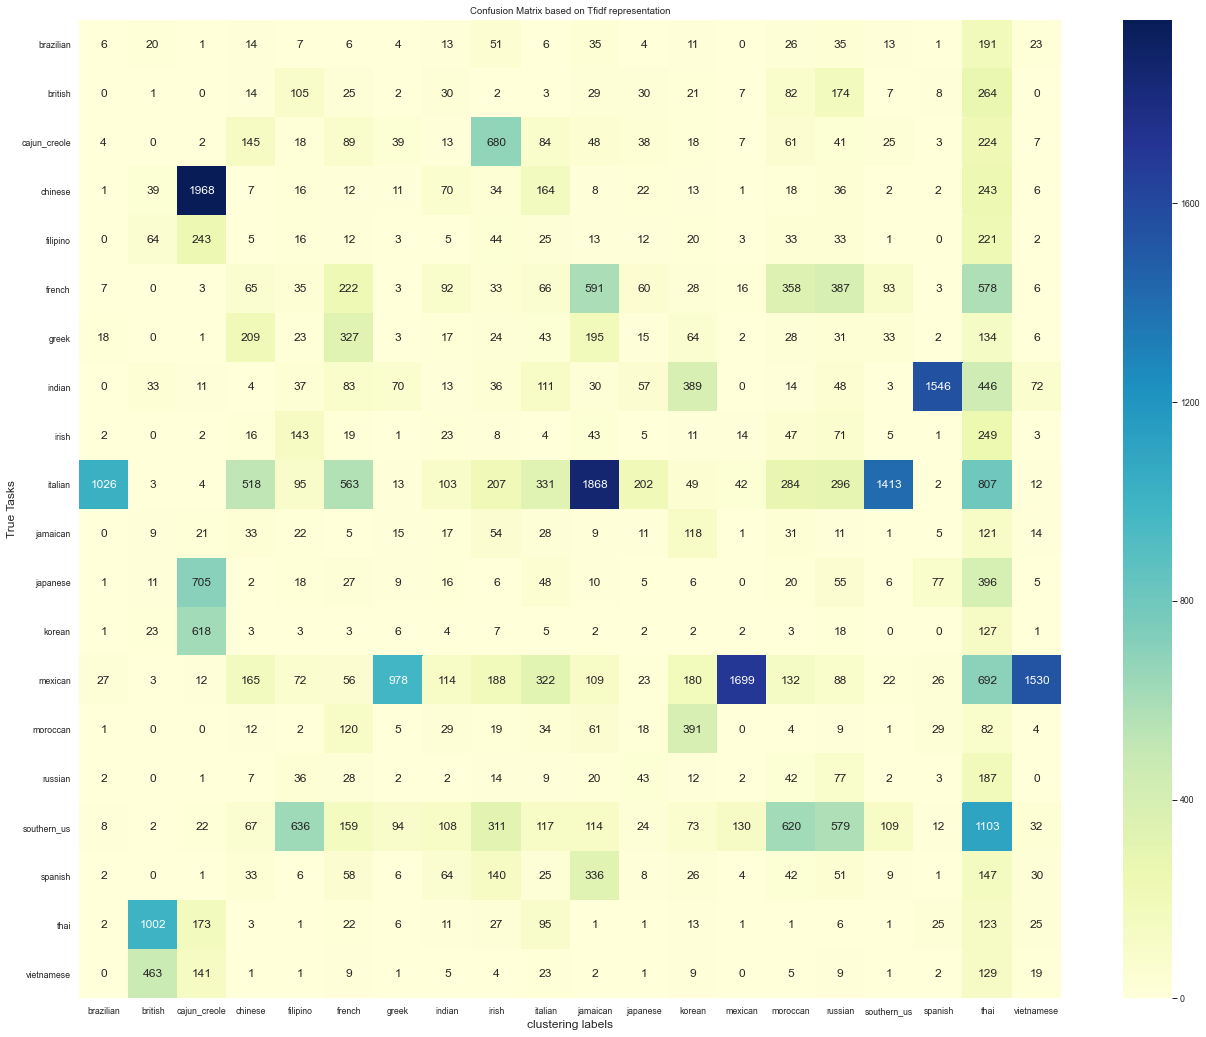

In [25]:
# creating a confusion matrix 
cm = confusion_matrix(y, kmeans.labels_, labels=np.arange(20))
# plot confusion matrix
plotCM(cm, le,'Confusion Matrix based on Tfidf representation')

In [ ]:
# Apply K-means clustering for dtm
kmeans_dtm = KMeans(n_clusters=20, random_state=seed).fit(dtm)
# creating a confusion matrix 
cm_dtm = confusion_matrix(y, kmeans_dtm.labels_, labels=np.arange(20))

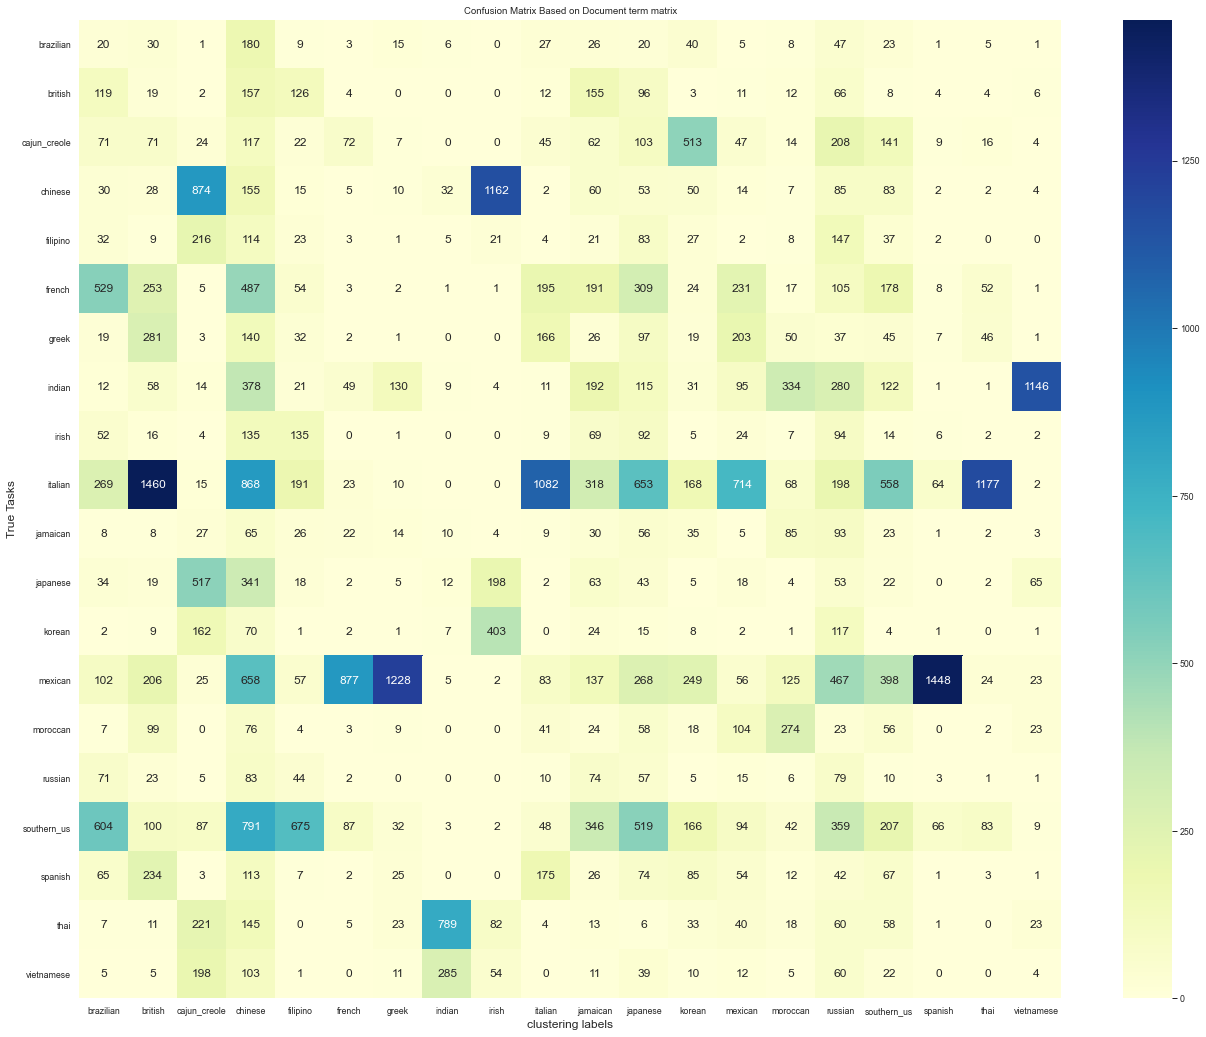

In [27]:
# plot confusion matrix
plotCM(cm_dtm, le,'Confusion Matrix Based on Document term matrix')

In [ ]:
# Randomly split the training and testing data
tf_X_train, tf_X_test, tf_y_train, tf_y_test = train_test_split(tfidf, y, test_size = 0.3, random_state = seed)
dtm_X_train, dtm_X_test, dtm_y_train, dtm_y_test = train_test_split(dtm, y, test_size = 0.3, random_state = seed)
norm_X_train, norm_X_test, norm_y_train, norm_y_test = train_test_split(norm_dtm, y, test_size = 0.3, random_state = seed)

              precision    recall  f1-score   support

           0       0.77      0.55      0.64       141
           1       0.57      0.35      0.43       244
           2       0.79      0.69      0.73       425
           3       0.80      0.85      0.82       759
           4       0.79      0.60      0.68       235
           5       0.60      0.63      0.61       810
           6       0.81      0.71      0.76       381
           7       0.86      0.91      0.89       965
           8       0.67      0.51      0.58       211
           9       0.80      0.90      0.85      2372
          10       0.87      0.67      0.76       166
          11       0.80      0.69      0.74       386
          12       0.82      0.73      0.77       246
          13       0.89      0.93      0.91      1904
          14       0.85      0.74      0.79       236
          15       0.64      0.41      0.50       147
          16       0.72      0.81      0.76      1309
          17       0.67    

In [46]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
#
# models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.780395 (0.009053)
LDA: 0.735354 (0.008923)
KNN: 0.628569 (0.008312)
RF: 0.748572 (0.004304)
NB: 0.260191 (0.010848)


In [0]:
model = SVC(kernel="linear", decision_function_shape = 'ovr')
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
# model accuracy for X_test   
accuracy = model.score(X_test, y_test)

In [0]:
print(classification_report(y_test, yhat))

**Feedforward neural networks with SGD and Adam optimizers**

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

In [0]:
# Randomly split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(tfidf, y, test_size = 0.3, random_state = seed, stratify=y)

In [0]:
# Standardlize the data
#scaler = StandardScaler()
#X_train_std = scaler.fit_transform(X_train)
#X_test_std = scaler.fit_transform(X_test)
# determine the number of input features
n_features = X_train.shape[1]

In [0]:
# define model
model = Sequential()
model.add(Dense(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dropout(0.8))
model.add(Dense(80, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.6))
model.add(Dense(40, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))
# Define optimizer
sgd = SGD(learning_rate=0.001, decay = 1e-6, momentum=0.8, nesterov = True)
# compile the model
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
# fit the model
history = model.fit(X_train_std, y_train, epochs=1000, batch_size=128, verbose=0, validation_split=0.3)

In [0]:
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [0]:
# evaluate the model
loss, acc = model.evaluate(X_test_std, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

In [0]:
# predict probabilities for test set
yhat_probs = model.predict(X_test_std, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test_std, verbose=0)

In [0]:
print(classification_report(y_test,yhat_classes))

In [0]:
# define model
model = Sequential()
model.add(Dense(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dropout(0.8))
model.add(Dense(80, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.6))
model.add(Dense(40, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
# fit the model
history = model.fit(X_train_std, y_train, epochs=500, batch_size=128, verbose=0, validation_split=0.3)

In [0]:
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [0]:
# evaluate the model
loss, acc = model.evaluate(X_test_std, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

In [0]:
# predict probabilities for test set
yhat_probs = model.predict(X_test_std, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test_std, verbose=0)

In [0]:
print(classification_report(y_test,yhat_classes))

In [0]:
# define model
model = Sequential()
model.add(Dense(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dropout(0.5))
model.add(Dense(60, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
# fit the model
history = model.fit(X_train_std, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.3)

In [0]:
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [0]:
# evaluate the model
loss, acc = model.evaluate(X_test_std, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

In [0]:
# predict probabilities for test set
yhat_probs = model.predict(X_test_std, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test_std, verbose=0)

In [0]:
print(classification_report(y_test,yhat_classes))

**Word2vec model**

In [4]:
cleaned_corpus = list()

for ls in data["ingredients"]:
    clean_ls = list()
    for ingredient in ls:
        # remove this description from the ingredients
        ingredient =  re.sub(r'\(.*oz.\)','', ingredient)
        clean_ls.append(ingredient.strip())
    cleaned_corpus.append(clean_ls)
        
len(cleaned_corpus)

39774

In [0]:
# Word2vec model parameters
# Word vector dimensionality       
num_features = 300    # Word vector dimensionality  
# 50% of the corpus                                 
min_word_count = 3 
# Number of CPUs   
num_workers = 4       
# Context window size; 
# let's use avg recipte size   
context = 10
# threshold for configuring which higher-frequency words are randomly downsampled                                                                                         
downsampling = 1e-3   

# Initialize and train the model 
model = Word2Vec(cleaned_corpus, workers=num_workers, \
                 size=num_features, min_count = min_word_count, \
                 window = context, sample = downsampling)

# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

In [9]:
len(model["green tomatoes"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


300

In [8]:
# Learned similarity
x = 'spinach'
b= 'broccoli'
a = 'bacon'
predicted = model.most_similar([x, b], [a])[0][0]
print(" {} is to  {} as {} is to {} ".format(a, b, x, predicted))

 bacon is to  broccoli as spinach is to noodles 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


**Plot TSNE to show the hi-dimensional learned embedding in a low dimensional space**

In [0]:
# Sort all the ingredient names in the model
document = sorted(model.wv.vocab.keys()) 
# Get the embedding tuple for each ingredient
emb_tuple = tuple([model[ingredient_name] for ingredient_name in document])
# Stack arrays in sequence vertically (row wise)
X = np.vstack(emb_tuple)
# Fit it to TSNE
X_tsne = TSNE(n_components=2).fit_transform(X)

In [0]:
counts_cuis = Counter(data["cuisine"]) # get the cuisine data
# Create a dictionary with cuisine name as keys and a list of ingredients with its number of count under each cuisine.
track_ingredients = dict(zip(counts_cuis.keys(), [list() for x in counts_cuis.keys()]))
for cui, ls in zip(data["cuisine"],data["ingredients"]):
    # append the number in the list
    clean_recipt = list()
    for ingred in ls:
      ingredient =  re.sub(r'\(.*oz.\)','', ingredient)
      clean_recipt.append(ingred.strip())
    track_ingredients[cui].extend(clean_recipt)
    
# Get the number of count for each item under each key
for label, tracking in track_ingredients.items():
    track_ingredients[label] = Counter(tracking)

In [0]:
def return_most_popular(v):
    cuisine = None
    record = 0
    for label, tracking in track_ingredients.items():
        norm_freq = float(tracking[v]) / float(counts_cuis[label])
        if norm_freq > record:
            cuisine = label
            record = norm_freq
    return cuisine

In [0]:
# Plot the TSNE
track_2color = {u'irish':"#000000", # blak
                u'mexican':"#FFFF00", #yellow
                u'chinese':"#1CE6FF", #cyan
                u'filipino': "#FF34FF", #pink 
                u'vietnamese':"#FF4A46", #red
                u'spanish':"#FFC300",  # green forest
                u'japanese':"#006FA6", # blue ocean
                u'moroccan':"#A30059",# purple
                u'french':"#FFDBE5",  #light pink
                u'greek': "#7A4900",  # gold or brown 
                u'indian':"#0000A6", # blue electric 
                u'jamaican':"#63FFAC", # green phospho
                u'british': "#B79762", #brown
                u'brazilian': "#EEC3FF", #  
                u'russian':"#8FB0FF", # light blue 
                u'cajun_creole':"#997D87", #violet
                u'thai':"#5A0007", 
                u'southern_us':"#809693", 
                u'korean':"#FEFFE6", #ligt yellow
                u'italian':"#1B4400"}

color_vector = list()
for v in document:
    cuisine = return_most_popular(v)
    color_vector.append(track_2color[cuisine])

#ensemble the legend
lgend = list()
for l, c in track_2color.items():
  lgend.append(mpatches.Patch(color=c, label=l))

sns.set_context("poster")
fig, ax = plt.subplots(figsize=(18,18))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color_vector, alpha=.6, s=60)
plt.legend(handles=lgend)